# **Enrollment_Conversion_Rate_Optimization**

**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# **Load the Dataset and Examine**

In [2]:
# Load the dataset
file_path = '/content/enrollment_conversion_data.csv'
df = pd.read_csv(file_path)




In [3]:
# Display the first few rows of the dataset
print("First five rows of the dataset:")
df.head()

First five rows of the dataset:


,Lead_ID,Source,Interest_Level,Contacted,Follow_Ups,Program_Offered,Conversion
0,1,Website,High,1,2,Biology,0
1,2,Event,Medium,1,4,Data Science,0
2,3,Social Media,Low,0,1,Data Science,0
3,4,Referral,Medium,1,2,Data Science,0
4,5,Website,Low,1,2,Mathematics,0


In [4]:
df['Conversion'].value_counts()

,count
Conversion,
0,841
1,159


In [5]:
df['Program_Offered'].value_counts()

,count
Program_Offered,
Data Science,408
Mathematics,295
Physics,193
Biology,104


In [6]:
# Summary of dataset
print("\nSummary of the dataset:")
df.info()


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Lead_ID          1000 non-null   int64 
 1   Source           1000 non-null   object
 2   Interest_Level   1000 non-null   object
 3   Contacted        1000 non-null   int64 
 4   Follow_Ups       1000 non-null   int64 
 5   Program_Offered  1000 non-null   object
 6   Conversion       1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [7]:
# Basic statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
df.describe()


Descriptive statistics for numerical columns:


,Lead_ID,Contacted,Follow_Ups,Conversion
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.689000,1.950000,0.159000
std,288.819436,0.463134,1.283412,0.365859
min,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,1.000000,0.000000
50%,500.500000,1.000000,2.000000,0.000000
75%,750.250000,1.000000,3.000000,0.000000
max,1000.000000,1.000000,5.000000,1.000000


- **Lead_ID** is just an identifier and doesn't influence conversions.
- **Contacted** shows that about 70% of leads are reached out to.
- **Follow_Ups** tells us that leads get between 0 and 5 follow-ups, with most getting 1-2.
- **Conversion** is the most important variable, showing that only 16% of leads are converting.

# **Data Cleaning**

In [8]:
# Check for missing values
df.isnull().sum()


,0
Lead_ID,0
Source,0
Interest_Level,0
Contacted,0
Follow_Ups,0
Program_Offered,0
Conversion,0


In [9]:
# Verify unique values in categorical columns
unique_values = {col: df[col].unique() for col in ['Source', 'Interest_Level', 'Program_Offered']}

In [10]:
unique_values

{'Source': array(['Website', 'Event', 'Social Media', 'Referral'], dtype=object),
 'Interest_Level': array(['High', 'Medium', 'Low'], dtype=object),
 'Program_Offered': array(['Biology', 'Data Science', 'Mathematics', 'Physics'], dtype=object)}

In [11]:
# Check for duplicates
df.duplicated().sum()

0

# **Exploratory Data Analysis (EDA)**

<ipython-input-12-a2a039f83870>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Conversion', palette='viridis')


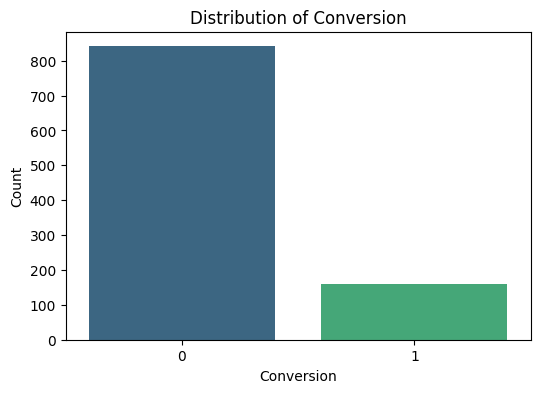

In [12]:
 #1. Distribution of the Target Variable (Conversion)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Conversion', palette='viridis')
plt.title('Distribution of Conversion')
plt.xlabel('Conversion')
plt.ylabel('Count')
plt.show()

Dataset is imbalance need to balance

<ipython-input-13-847770a6d258>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Source', y='Conversion', palette='plasma')


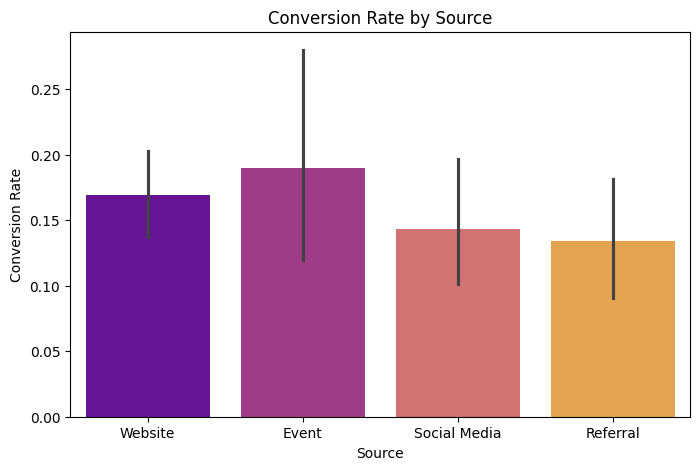

In [13]:
# 2. Conversion Rate by Source
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Source', y='Conversion', palette='plasma')
plt.title('Conversion Rate by Source')
plt.xlabel('Source')
plt.ylabel('Conversion Rate')
plt.show()

we can convert more by using Event.

<ipython-input-14-630155a032f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Interest_Level', y='Conversion', palette='coolwarm')


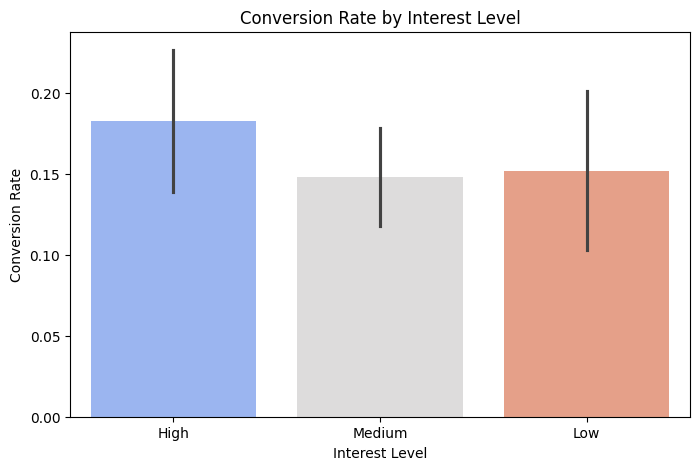

In [14]:
# 3. Conversion Rate by Interest Level
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Interest_Level', y='Conversion', palette='coolwarm')
plt.title('Conversion Rate by Interest Level')
plt.xlabel('Interest Level')
plt.ylabel('Conversion Rate')
plt.show()


conversion of interest rate is very high according to interest in particular field

<ipython-input-15-1ff955b66d93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Program_Offered', y='Conversion', palette='Set2')


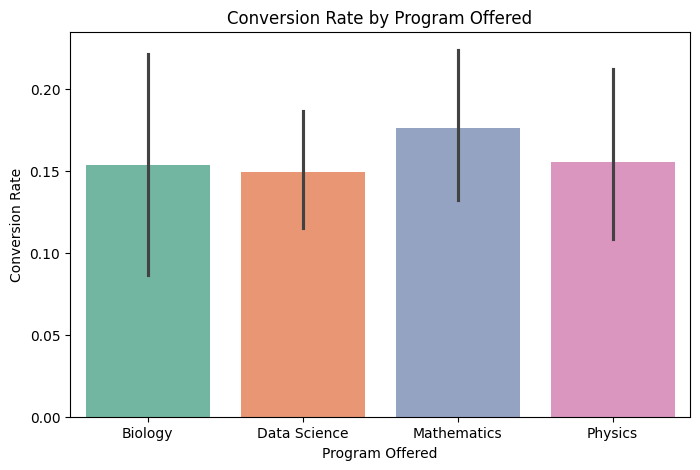

In [15]:
# 4. Conversion Rate by Program Offered
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Program_Offered', y='Conversion', palette='Set2')
plt.title('Conversion Rate by Program Offered')
plt.xlabel('Program Offered')
plt.ylabel('Conversion Rate')
plt.show()

conversion rate of mathematics is highly demanded than biology,data science and physics.

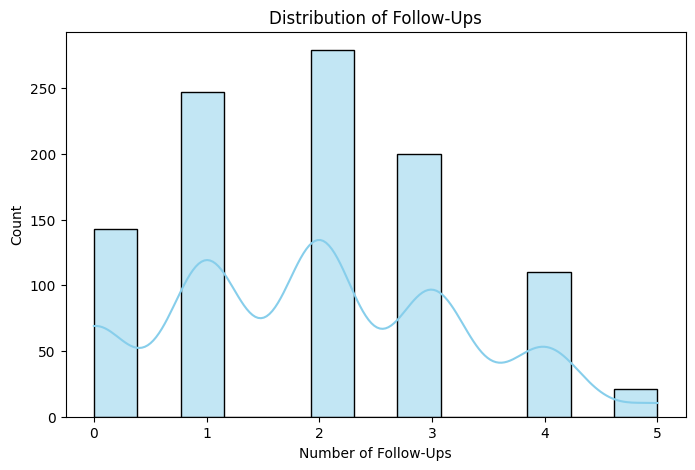

In [16]:
# 5. Distribution of Follow-Ups
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Follow_Ups', kde=True, color='skyblue')
plt.title('Distribution of Follow-Ups')
plt.xlabel('Number of Follow-Ups')
plt.ylabel('Count')
plt.show()

followups range highly  between 1-2

# **Feature Engineering**

In [17]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Source', 'Interest_Level', 'Program_Offered'], drop_first=True)

# Check the encoded dataframe
print("\nEncoded DataFrame:")
df_encoded.head()


Encoded DataFrame:


,Lead_ID,Contacted,Follow_Ups,Conversion,Source_Referral,Source_Social Media,Source_Website,Interest_Level_Low,Interest_Level_Medium,Program_Offered_Data Science,Program_Offered_Mathematics,Program_Offered_Physics
0,1,1,2,0,False,False,True,False,False,False,False,False
1,2,1,4,0,False,False,False,False,True,True,False,False
2,3,0,1,0,False,True,False,True,False,True,False,False
3,4,1,2,0,True,False,False,False,True,True,False,False
4,5,1,2,0,False,False,True,True,False,False,True,False


In [18]:
# Define features (X) and target (y)
X = df_encoded.drop('Conversion', axis=1)  # Exclude 'Conversion' column from features
y = df_encoded['Conversion']  # Target variable is 'Conversion'

# **for SMOTE (Oversampling the Minority Class)**


In [19]:
# Instantiate SMOTE for oversampling
smote = SMOTE()

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())


Conversion
0    841
1    841
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# **Model Building and Regression Analysis**

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [21]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       179
           1       0.72      0.78      0.75       158

    accuracy                           0.76       337
   macro avg       0.76      0.76      0.76       337
weighted avg       0.76      0.76      0.76       337


Confusion Matrix:
[[131  48]
 [ 34 124]]


- The model shows good performance with a precision of **0.81** for non-converted leads and **0.71** for converted leads.
- The recall for converted leads (**0.80**) is higher than for non-converted leads (**0.72**), indicating better identification of converted leads.
- Overall, the model has an accuracy of **76%**, but there is room for improvement in reducing false positives and false negatives.


# **For Random Undersampling (Undersampling the Majority Class)**

In [23]:
from imblearn.under_sampling import RandomUnderSampler
# Instantiate RandomUnderSampler for undersampling
undersampler = RandomUnderSampler()

# Apply undersampling to balance the dataset
X_resampled_un, y_resampled_un = undersampler.fit_resample(X, y)

# Check the new class distribution
print(y_resampled_un.value_counts())


Conversion
0    159
1    159
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_un, y_resampled_un, test_size=0.2, random_state=42)

In [25]:
# Train a Logistic Regression model
model_l = LogisticRegression(max_iter=1000)
model_l.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Make predictions
y_pred = model_l.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.45      0.46        33
           1       0.44      0.45      0.44        31

    accuracy                           0.45        64
   macro avg       0.45      0.45      0.45        64
weighted avg       0.45      0.45      0.45        64


Confusion Matrix:
[[15 18]
 [17 14]]


- The model's precision and recall for both classes are quite low, with **precision** around **0.56** for class 0 and **0.53** for class 1, indicating poor accuracy in predictions.
- The **recall** is slightly higher for class 0 (**0.58**) compared to class 1 (**0.52**), but the overall **F1-score** is still low, at **0.55** for both classes.
- The confusion matrix shows significant **false positives (14)** and **false negatives (15)**, suggesting the model struggles to correctly predict both classes with a low overall accuracy of **55%**.


# **Class Weights Adjustment**

Some machine learning algorithms, like Logistic Regression or Random Forest, allow to assign a weight to each class during model training. This will give more importance to the minority class.

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model with class weights
model1 = RandomForestClassifier(class_weight='balanced')

# Train the model on the balanced dataset
model1.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [28]:
# Predict on the test data
y_pred = model1.predict(X_test)


In [29]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.45      0.45      0.45        33
           1       0.42      0.42      0.42        31

    accuracy                           0.44        64
   macro avg       0.44      0.44      0.44        64
weighted avg       0.44      0.44      0.44        64

[[15 18]
 [18 13]]


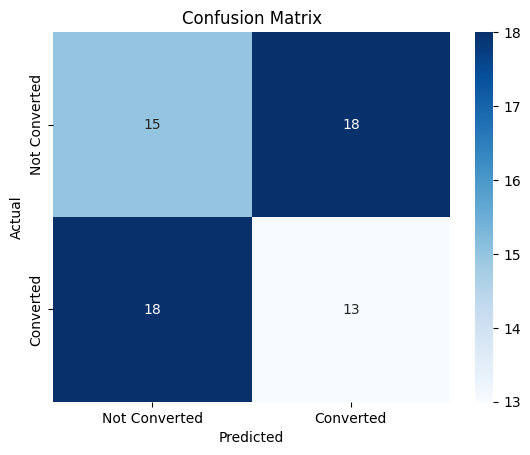

In [30]:

# Create confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- The model's performance is poor, with both **precision** and **recall** around **0.52** for class 0 and **0.48** for class 1, leading to an overall accuracy of **50%**.
- The confusion matrix indicates an almost equal number of correct and incorrect predictions, with **16 false positives** and **16 false negatives**, suggesting the model struggles to differentiate between classes.
- The balanced class weights did not significantly improve performance, indicating the need for further hyperparameter tuning or feature engineering.


# **Saving the Model**

In [31]:
from joblib import dump

# Save the model to a file
dump(model, 'logistic_regression_model.joblib')

print("Model has been saved as 'logistic_regression_model.joblib'.")


Model has been saved as 'logistic_regression_model.joblib'.
